In [13]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 500 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)

# Load, merge, and Subset Data

<Item title:"SAC_Tree_Inventory" type:Feature Layer Collection owner:Anooshi>
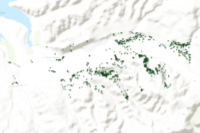

In [17]:
# Load data from arcGIS online
output = arcGIS_data_load('3c4141cd6e664d069d24ec6c728f0ab1')

tree = output['data0']
dbh = output['table0']
feature_service = output['feature_service']

In [18]:
# Merge related table and feature layer
data = tree.merge(dbh, left_on='GlobalID', right_on='Ref_to_Trees', how='outer')
data = data.drop(columns=['GlobalID_x','OBJECTID_x','Ref_to_Trees'])
data = data.rename(columns={'GlobalID_y':'GlobalID', 'OBJECTID_y':'OBJECTID'})

In [16]:
data.head()

,Surveyor_1,Species_Sci,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,Observation_Date,DeadAlive,Surveyor_2,ESRIGNSS_AVG_H_RMS,Life_Stage,Recruit_Count,SHAPE,OBJECTID,DBH,GlobalID
0,Rusty Hutto,Quercus lobata,None,NaN,GNSS:84087,2020-02-04 20:03:09,Alive,Ryan Anderson,0.996632,Mature,0,"{'x': 6188364.040633421, 'y': 2037325.9975448505, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",12.0,41.3,2423ac4e-6d71-43e9-9e7b-2067d0e25f86
1,Rusty Hutto,Quercus lobata,None,NaN,GNSS:84087,2020-02-04 20:08:22,Alive,Ryan Anderson,2.387992,Mature,0,"{'x': 6188290.176779703, 'y': 2037281.534803413, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",13.0,58.2,98be25f8-2be0-4969-9c82-0efe4c196672
2,Kevin Sherrill,Quercus lobata,None,NaN,GNSS:84087,2020-02-04 20:13:13,Alive,Ryan Anderson,3.142830,Mature,0,"{'x': 6188186.705085688, 'y': 2037111.8091095453, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",14.0,34.7,4800c6a8-2b13-434f-9797-b2afdf24e096
3,Kevin Sherrill,Quercus lobata,None,NaN,GNSS:84087,2020-02-04 20:16:04,Alive,Ryan Anderson,4.479174,Mature,0,"{'x': 6188190.272926946, 'y': 2037097.4080556592, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",15.0,36.7,a787c2f3-c70e-4bae-8455-f1a7f5676a1c
4,Kevin Sherrill,Sambucus nigra,None,NaN,GNSS:84087,2020-02-04 20:18:08,Alive,Ryan Anderson,2.480506,Shrub,0,"{'x': 6188164.266908024, 'y': 2037109.0825585658, 'spatialReference': {'wkid': 103005, 'latestWkid': 6420}}",NaN,NaN,NaN


In [19]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2019

Analysis for 2019-10-01 07:00 UTC to 2020-10-01 07:00 UTC
Entries in Subset: 1122


# QAQC

In [20]:
validate_domains(feature_service)
#Check number of entries against ArcGIS Online



Table/Layer:  DBH_Observations


No Mismatches Found


Table/Layer:  Trees


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,{Richard Graham-Bruno}
0,Surveyor_2,{Richard Graham-Bruno}


In [11]:
QAQC_whitespace(sub, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: DeadAlive
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sci
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Recruit_Count
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Life_Stage
No \xa0 characters found
No d

In [21]:
find_blank_entries(sub, exclude_cols=['Comments', 'Surveyor_2', 'ESRIGNSS_H_RMS'])

No blank DeadAlive
No blank Species_Sci
Blank GlobalID entrie(s) exist!


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
4,2020-02-04 21:18:08.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.480506,"{'x': 6188164.266812637, 'y': 2037109.082594812, 'spatialReference...",NaN,NaN,NaN
5,2020-02-04 21:19:58.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.942611,"{'x': 6188150.0486652255, 'y': 2037119.9355914742, 'spatialReferen...",NaN,NaN,NaN
6,2020-02-04 21:20:39.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,4.304446,"{'x': 6188158.0670218915, 'y': 2037113.6587011367, 'spatialReferen...",NaN,NaN,NaN
85,2020-02-05 21:31:55.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Recruit,21-50,Grove of stunted QULO recruits along hillside. ~800 sq ft.,NaN,None,NaN,"{'x': 6188041.62827839, 'y': 2037347.9561328143, 'spatialReference...",NaN,NaN,NaN
107,2020-02-05 18:55:14.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.548662,"{'x': 6184426.533474475, 'y': 2035571.4019431472, 'spatialReferenc...",NaN,NaN,NaN
108,2020-02-05 18:57:04.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,1.215862,"{'x': 6184420.877317801, 'y': 2035576.707706809, 'spatialReference...",NaN,NaN,NaN
130,2020-02-05 20:21:44.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,1.272187,"{'x': 6185020.951905057, 'y': 2036215.7996044755, 'spatialReferenc...",NaN,NaN,NaN
131,2020-02-05 20:25:08.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.669442,"{'x': 6185021.518176883, 'y': 2036219.1027474701, 'spatialReferenc...",NaN,NaN,NaN
141,2020-02-05 20:43:40.000000000,Brian Creeks,Kevin Sherrill,Sambucus nigra,Alive,Shrub,0,"Base is covered in metal debris (barbwire, pieties of old browse c...",NaN,GNSS:84087,0.283553,"{'x': 6185103.870046303, 'y': 2036040.070297137, 'spatialReference...",NaN,NaN,NaN
158,2020-02-05 21:48:02.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.226185,"{'x': 6185196.345583141, 'y': 2036307.4667439759, 'spatialReferenc...",NaN,NaN,NaN


No blank Recruit_Count
Blank ESRIGNSS_RECEIVER entrie(s) exist!


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
41,2020-02-04 21:12:51.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Mature,0,None,NaN,None,NaN,"{'x': 6188281.788559213, 'y': 2037356.0889905542, 'spatialReferenc...",50.0,42.0,2b3e04c6-e1ae-40fd-80ef-edbf6da23e6d
44,2020-02-04 21:28:02.000000000,Rusty Hutto,Roger Stephens,Quercus lobata,Alive,Mature,0,None,NaN,None,NaN,"{'x': 6188492.585053638, 'y': 2037140.2026113123, 'spatialReferenc...",53.0,47.7,e133577d-6c84-458a-80f6-0df86368b5a6
45,2020-02-04 21:30:18.000000000,Rusty Hutto,Roger Stephens,Quercus agrifolia,Alive,Mature,2-5,None,NaN,None,NaN,"{'x': 6188530.440620974, 'y': 2037122.3000880629, 'spatialReferenc...",54.0,5.2,f388aa2d-828c-43df-8773-b6f1e3303bac
46,2020-02-04 21:30:18.000000000,Rusty Hutto,Roger Stephens,Quercus agrifolia,Alive,Mature,2-5,None,NaN,None,NaN,"{'x': 6188530.440620974, 'y': 2037122.3000880629, 'spatialReferenc...",55.0,4.6,431dff8f-14ff-416f-ad8b-6b0d7bbd8a33
47,2020-02-04 21:30:18.000000000,Rusty Hutto,Roger Stephens,Quercus agrifolia,Alive,Mature,2-5,None,NaN,None,NaN,"{'x': 6188530.440620974, 'y': 2037122.3000880629, 'spatialReferenc...",56.0,3.1,3dab455d-ff38-4e24-ae59-6ca129e5f05e
64,2020-02-04 21:47:49.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188515.56040138, 'y': 2037228.829402566, 'spatialReference'...",73.0,14.9,9cded59b-076c-4f4d-8bfb-2420be6582f2
65,2020-02-04 21:47:49.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188515.56040138, 'y': 2037228.829402566, 'spatialReference'...",74.0,12.1,4c4c1ed0-6438-4ece-8b4b-33cabc2a7dbe
66,2020-02-04 21:49:43.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188526.076456472, 'y': 2037235.2870668173, 'spatialReferenc...",75.0,12.4,415f62ea-07b5-4bb9-bad7-d9dde6a8d974
67,2020-02-04 21:49:43.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188526.076456472, 'y': 2037235.2870668173, 'spatialReferenc...",76.0,12.9,957f754b-2c5a-4ef2-84fd-e44977fa139f
85,2020-02-05 21:31:55.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Recruit,21-50,Grove of stunted QULO recruits along hillside. ~800 sq ft.,NaN,None,NaN,"{'x': 6188041.62827839, 'y': 2037347.9561328143, 'spatialReference...",NaN,NaN,NaN


No blank Surveyor_1
No blank Life_Stage
Blank DBH entrie(s) exist!


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
4,2020-02-04 21:18:08.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.480506,"{'x': 6188164.266812637, 'y': 2037109.082594812, 'spatialReference...",NaN,NaN,NaN
5,2020-02-04 21:19:58.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.942611,"{'x': 6188150.0486652255, 'y': 2037119.9355914742, 'spatialReferen...",NaN,NaN,NaN
6,2020-02-04 21:20:39.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,4.304446,"{'x': 6188158.0670218915, 'y': 2037113.6587011367, 'spatialReferen...",NaN,NaN,NaN
85,2020-02-05 21:31:55.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Recruit,21-50,Grove of stunted QULO recruits along hillside. ~800 sq ft.,NaN,None,NaN,"{'x': 6188041.62827839, 'y': 2037347.9561328143, 'spatialReference...",NaN,NaN,NaN
107,2020-02-05 18:55:14.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.548662,"{'x': 6184426.533474475, 'y': 2035571.4019431472, 'spatialReferenc...",NaN,NaN,NaN
108,2020-02-05 18:57:04.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,1.215862,"{'x': 6184420.877317801, 'y': 2035576.707706809, 'spatialReference...",NaN,NaN,NaN
130,2020-02-05 20:21:44.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,1.272187,"{'x': 6185020.951905057, 'y': 2036215.7996044755, 'spatialReferenc...",NaN,NaN,NaN
131,2020-02-05 20:25:08.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.669442,"{'x': 6185021.518176883, 'y': 2036219.1027474701, 'spatialReferenc...",NaN,NaN,NaN
141,2020-02-05 20:43:40.000000000,Brian Creeks,Kevin Sherrill,Sambucus nigra,Alive,Shrub,0,"Base is covered in metal debris (barbwire, pieties of old browse c...",NaN,GNSS:84087,0.283553,"{'x': 6185103.870046303, 'y': 2036040.070297137, 'spatialReference...",NaN,NaN,NaN
158,2020-02-05 21:48:02.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.226185,"{'x': 6185196.345583141, 'y': 2036307.4667439759, 'spatialReferenc...",NaN,NaN,NaN


Blank OBJECTID entrie(s) exist!


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
4,2020-02-04 21:18:08.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.480506,"{'x': 6188164.266812637, 'y': 2037109.082594812, 'spatialReference...",NaN,NaN,NaN
5,2020-02-04 21:19:58.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.942611,"{'x': 6188150.0486652255, 'y': 2037119.9355914742, 'spatialReferen...",NaN,NaN,NaN
6,2020-02-04 21:20:39.000000000,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,4.304446,"{'x': 6188158.0670218915, 'y': 2037113.6587011367, 'spatialReferen...",NaN,NaN,NaN
85,2020-02-05 21:31:55.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Recruit,21-50,Grove of stunted QULO recruits along hillside. ~800 sq ft.,NaN,None,NaN,"{'x': 6188041.62827839, 'y': 2037347.9561328143, 'spatialReference...",NaN,NaN,NaN
107,2020-02-05 18:55:14.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.548662,"{'x': 6184426.533474475, 'y': 2035571.4019431472, 'spatialReferenc...",NaN,NaN,NaN
108,2020-02-05 18:57:04.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,1.215862,"{'x': 6184420.877317801, 'y': 2035576.707706809, 'spatialReference...",NaN,NaN,NaN
130,2020-02-05 20:21:44.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,1.272187,"{'x': 6185020.951905057, 'y': 2036215.7996044755, 'spatialReferenc...",NaN,NaN,NaN
131,2020-02-05 20:25:08.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.669442,"{'x': 6185021.518176883, 'y': 2036219.1027474701, 'spatialReferenc...",NaN,NaN,NaN
141,2020-02-05 20:43:40.000000000,Brian Creeks,Kevin Sherrill,Sambucus nigra,Alive,Shrub,0,"Base is covered in metal debris (barbwire, pieties of old browse c...",NaN,GNSS:84087,0.283553,"{'x': 6185103.870046303, 'y': 2036040.070297137, 'spatialReference...",NaN,NaN,NaN
158,2020-02-05 21:48:02.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84087,0.226185,"{'x': 6185196.345583141, 'y': 2036307.4667439759, 'spatialReferenc...",NaN,NaN,NaN


No blank SHAPE
No blank Observation_Date
Blank ESRIGNSS_AVG_H_RMS entrie(s) exist!


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
41,2020-02-04 21:12:51.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Mature,0,None,NaN,None,NaN,"{'x': 6188281.788559213, 'y': 2037356.0889905542, 'spatialReferenc...",50.0,42.00,2b3e04c6-e1ae-40fd-80ef-edbf6da23e6d
44,2020-02-04 21:28:02.000000000,Rusty Hutto,Roger Stephens,Quercus lobata,Alive,Mature,0,None,NaN,None,NaN,"{'x': 6188492.585053638, 'y': 2037140.2026113123, 'spatialReferenc...",53.0,47.70,e133577d-6c84-458a-80f6-0df86368b5a6
45,2020-02-04 21:30:18.000000000,Rusty Hutto,Roger Stephens,Quercus agrifolia,Alive,Mature,2-5,None,NaN,None,NaN,"{'x': 6188530.440620974, 'y': 2037122.3000880629, 'spatialReferenc...",54.0,5.20,f388aa2d-828c-43df-8773-b6f1e3303bac
46,2020-02-04 21:30:18.000000000,Rusty Hutto,Roger Stephens,Quercus agrifolia,Alive,Mature,2-5,None,NaN,None,NaN,"{'x': 6188530.440620974, 'y': 2037122.3000880629, 'spatialReferenc...",55.0,4.60,431dff8f-14ff-416f-ad8b-6b0d7bbd8a33
47,2020-02-04 21:30:18.000000000,Rusty Hutto,Roger Stephens,Quercus agrifolia,Alive,Mature,2-5,None,NaN,None,NaN,"{'x': 6188530.440620974, 'y': 2037122.3000880629, 'spatialReferenc...",56.0,3.10,3dab455d-ff38-4e24-ae59-6ca129e5f05e
64,2020-02-04 21:47:49.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188515.56040138, 'y': 2037228.829402566, 'spatialReference'...",73.0,14.90,9cded59b-076c-4f4d-8bfb-2420be6582f2
65,2020-02-04 21:47:49.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188515.56040138, 'y': 2037228.829402566, 'spatialReference'...",74.0,12.10,4c4c1ed0-6438-4ece-8b4b-33cabc2a7dbe
66,2020-02-04 21:49:43.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188526.076456472, 'y': 2037235.2870668173, 'spatialReferenc...",75.0,12.40,415f62ea-07b5-4bb9-bad7-d9dde6a8d974
67,2020-02-04 21:49:43.000000000,Roger Stephens,Rusty Hutto,Aesculus californica,Alive,Mature,0,2 stem.,NaN,None,NaN,"{'x': 6188526.076456472, 'y': 2037235.2870668173, 'spatialReferenc...",76.0,12.90,957f754b-2c5a-4ef2-84fd-e44977fa139f
85,2020-02-05 21:31:55.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Recruit,21-50,Grove of stunted QULO recruits along hillside. ~800 sq ft.,NaN,None,NaN,"{'x': 6188041.62827839, 'y': 2037347.9561328143, 'spatialReference...",NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


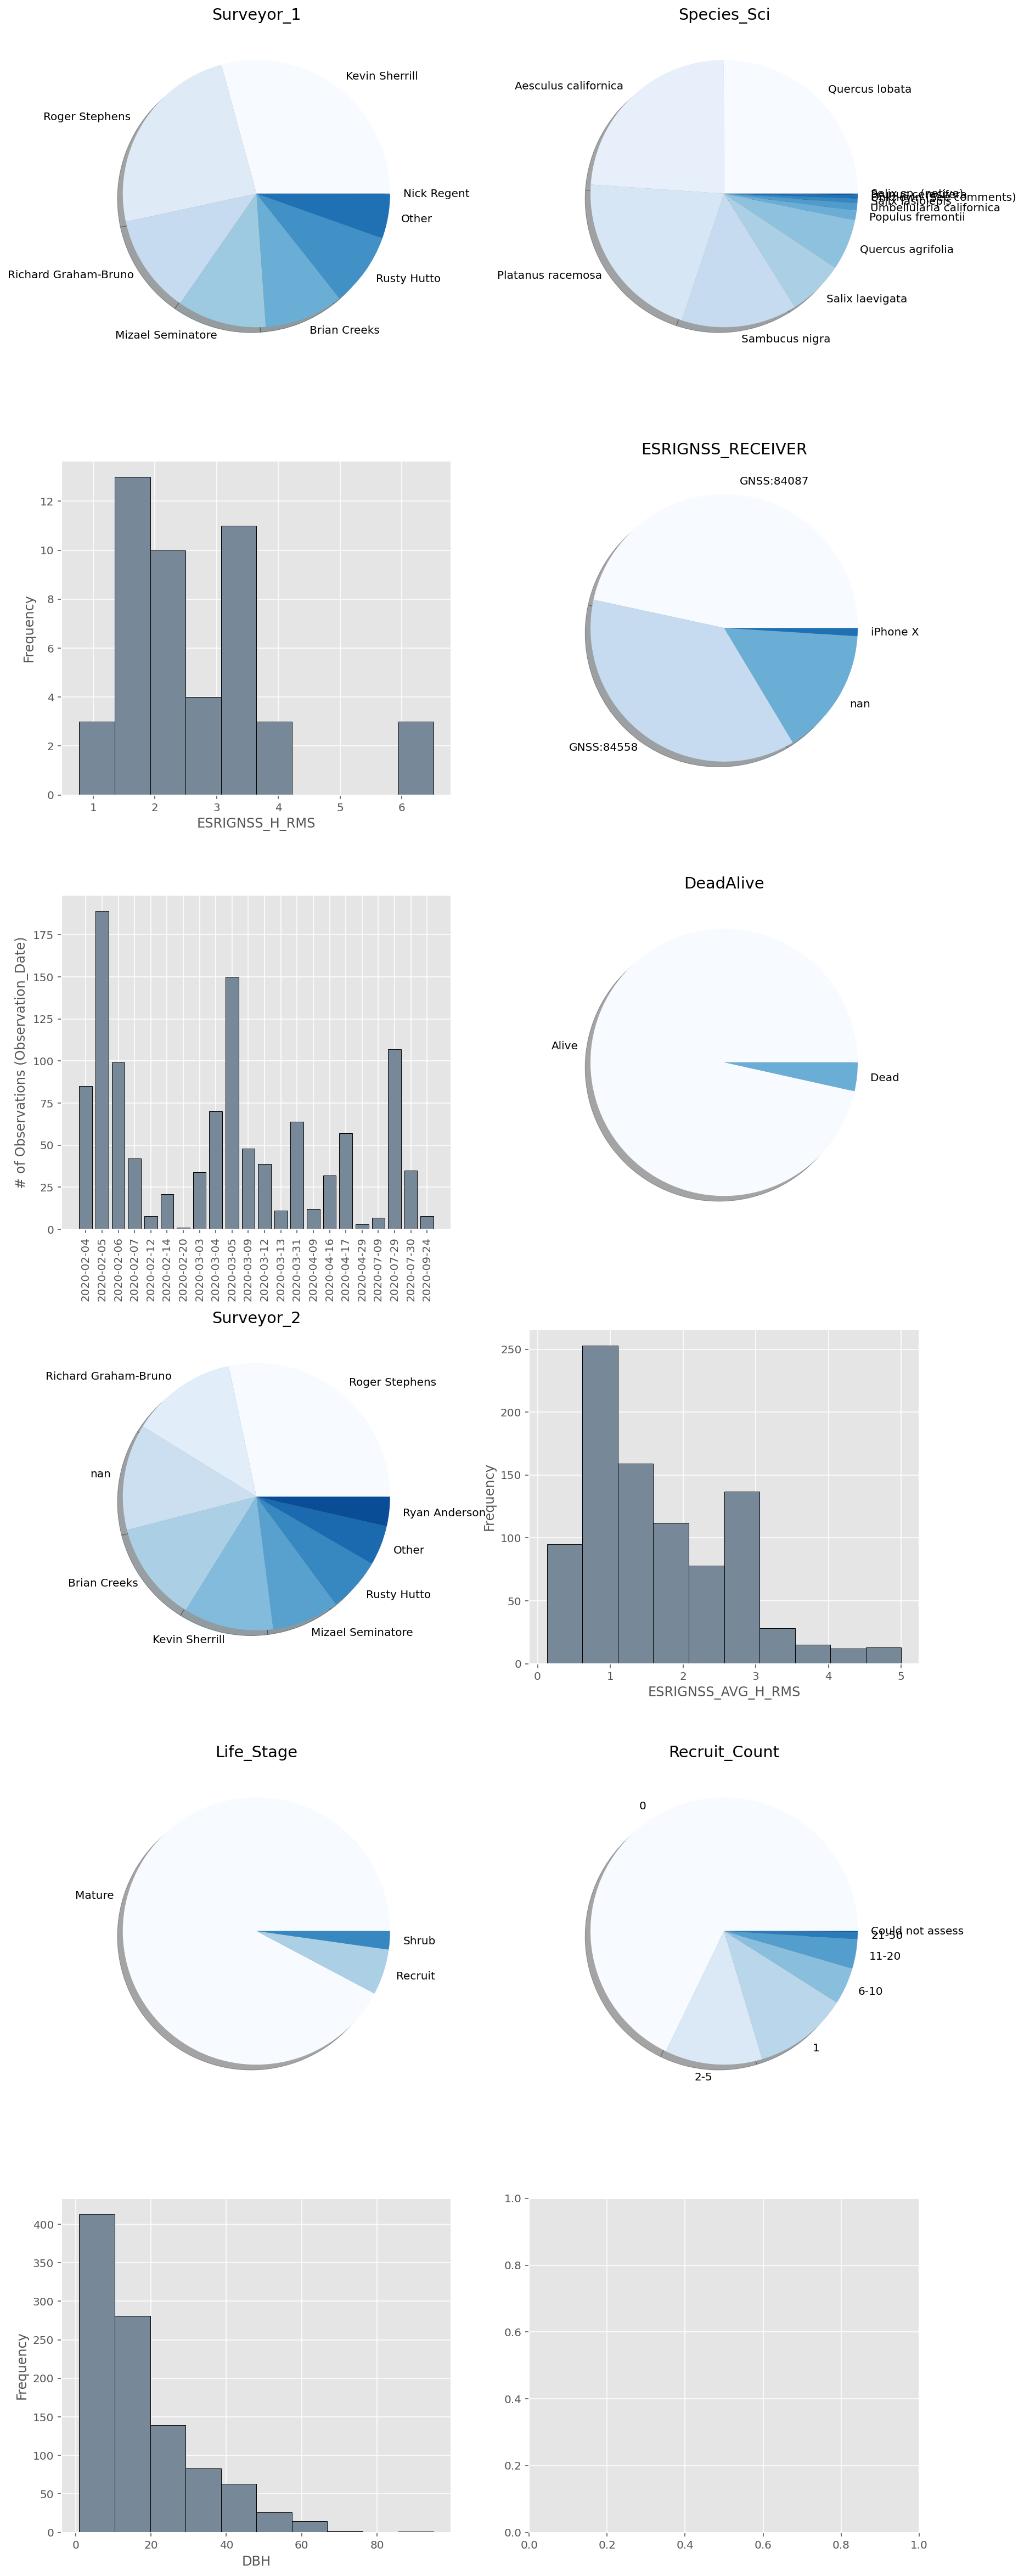

In [22]:
QAQC_plot(sub, cols_to_plot=['Surveyor_1', 'Species_Sci', 'ESRIGNSS_H_RMS',
       'ESRIGNSS_RECEIVER', 'Observation_Date', 'DeadAlive', 'Surveyor_2',
       'ESRIGNSS_AVG_H_RMS', 'Life_Stage', 'Recruit_Count',
        'DBH'])

DBH  Outlier: True
See Outlier Entries Below:


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID,DBH_Outlier
1,2020-02-04 21:08:22.000000000,Rusty Hutto,Ryan Anderson,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84087,2.387992,"{'x': 6188290.176665798, 'y': 2037281.534677729, 'spatialReference...",13.0,58.2,98be25f8-2be0-4969-9c82-0efe4c196672,True
42,2020-02-04 21:15:34.000000000,Rusty Hutto,Roger Stephens,Quercus lobata,Alive,Mature,0,"Oozing under branch, potential pathogen",NaN,GNSS:84558,2.486536,"{'x': 6188196.214583382, 'y': 2037425.4677888155, 'spatialReferenc...",51.0,65.5,530e5841-6e2c-49c5-b99a-9d2a4042c7e5,True
86,2020-02-05 21:37:59.000000000,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Mature,2-5,None,NaN,GNSS:84558,3.689480,"{'x': 6187858.878971964, 'y': 2037334.3278792202, 'spatialReferenc...",94.0,67.4,709931e0-3973-4696-9c81-5f8e6476bbe1,True
87,2020-02-05 21:43:01.052000046,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Mature,0,Woodpecker granary tree.,NaN,GNSS:84558,3.699994,"{'x': 6188032.389451727, 'y': 2037565.930434391, 'spatialReference...",95.0,66.1,1c8e678b-2b3a-4e3d-b200-de0066abcbfa,True
88,2020-02-05 21:46:56.157999992,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Mature,0,Rodent midden inside tree.,NaN,GNSS:84558,0.496744,"{'x': 6187972.701250881, 'y': 2037718.498042643, 'spatialReference...",96.0,53.5,1ccbf44c-30bb-4134-b910-55d193881cc4,True
93,2020-02-05 21:54:30.969000101,Roger Stephens,Rusty Hutto,Quercus lobata,Alive,Mature,0,,NaN,GNSS:84558,2.288921,"{'x': 6187745.00944905, 'y': 2037624.047116056, 'spatialReference'...",101.0,51.6,27ccb00a-e197-4cf3-a776-dd26b198b98e,True
110,2020-02-05 19:04:59.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Mature,0,Oozing old wound from losing a large limb with fungal growth,NaN,GNSS:84087,1.246425,"{'x': 6184549.527651057, 'y': 2035596.8054356426, 'spatialReferenc...",116.0,52.6,5b4a3f35-d64b-4a44-8acd-dedab2b83b41,True
112,2020-02-05 19:12:26.000000000,Brian Creeks,Kevin Sherrill,Quercus lobata,Alive,Mature,0,"Multiple large cavities, good habitat structures",NaN,GNSS:84087,0.956246,"{'x': 6184739.265460551, 'y': 2035691.0086593032, 'spatialReferenc...",118.0,62.1,2fddff8d-73bd-4f8b-93db-e20311dc4c68,True
117,2020-02-05 19:48:58.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Mature,0,Active acorn granary.,NaN,GNSS:84087,0.681304,"{'x': 6184817.617009893, 'y': 2035991.3610769808, 'spatialReferenc...",123.0,52.3,35d48c1c-ab9c-4dc2-a557-ef5775a8127b,True
121,2020-02-05 19:54:47.000000000,Kevin Sherrill,Brian Creeks,Quercus lobata,Alive,Mature,6-10,"Recruits along hillslope, large cavity above sign.",NaN,GNSS:84087,1.140312,"{'x': 6184960.052420557, 'y': 2036102.3844769746, 'spatialReferenc...",127.0,58.7,98e3d006-0cfd-4871-907b-94cec76f0e38,True


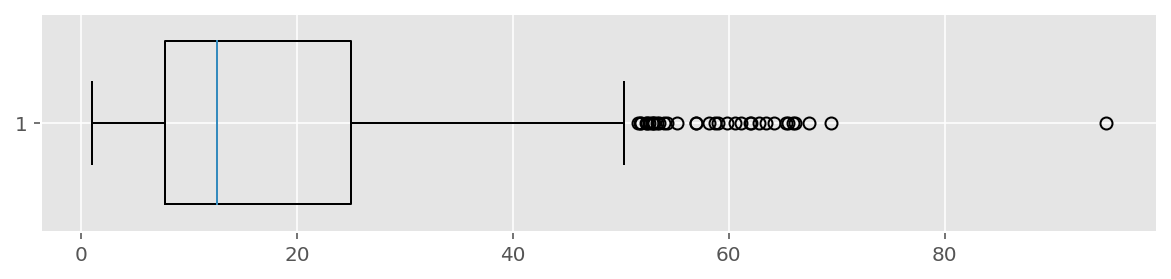

,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID,DBH_Outlier
0,2020-02-04 21:03:09,Rusty Hutto,Ryan Anderson,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84087,0.996632,"{'x': 6188364.040691301, 'y': 2037325.9975153059, 'spatialReferenc...",12.0,41.3,2423ac4e-6d71-43e9-9e7b-2067d0e25f86,False
1,2020-02-04 21:08:22,Rusty Hutto,Ryan Anderson,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84087,2.387992,"{'x': 6188290.176665798, 'y': 2037281.534677729, 'spatialReference...",13.0,58.2,98be25f8-2be0-4969-9c82-0efe4c196672,True
2,2020-02-04 21:13:13,Kevin Sherrill,Ryan Anderson,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84087,3.142830,"{'x': 6188186.705087975, 'y': 2037111.8089673072, 'spatialReferenc...",14.0,34.7,4800c6a8-2b13-434f-9797-b2afdf24e096,False
3,2020-02-04 21:16:04,Kevin Sherrill,Ryan Anderson,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84087,4.479174,"{'x': 6188190.27299422, 'y': 2037097.4080774784, 'spatialReference...",15.0,36.7,a787c2f3-c70e-4bae-8455-f1a7f5676a1c,False
4,2020-02-04 21:18:08,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,2.480506,"{'x': 6188164.266812637, 'y': 2037109.082594812, 'spatialReference...",NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2020-09-24 19:52:33,Richard Graham-Bruno,Roger Stephens,Quercus lobata,Dead,Mature,0,Dead snag,NaN,iPhone X,5.000000,"{'x': 6185514.277690053, 'y': 2036437.882493645, 'spatialReference...",1034.0,40.8,a80b2d02-9917-4e54-a869-e615e43bca0f,False
1118,2020-09-24 19:57:00,Richard Graham-Bruno,Roger Stephens,Quercus lobata,Alive,Mature,0,Heavily trafficked cattle area.,NaN,iPhone X,5.000000,"{'x': 6185531.515188381, 'y': 2036125.085218981, 'spatialReference...",1035.0,32.0,bcd29e08-311c-4145-9cad-b7c8f62b29c0,False
1119,2020-09-24 20:01:30,Richard Graham-Bruno,Roger Stephens,Quercus lobata,Alive,Mature,0,Possible RTH nest in tree.,NaN,iPhone X,5.000000,"{'x': 6185816.633384556, 'y': 2036295.0081074834, 'spatialReferenc...",1036.0,51.9,093a5038-6b7c-468c-9f58-ad308a584132,True
1120,2020-09-24 20:06:49,Richard Graham-Bruno,Roger Stephens,Quercus lobata,Alive,Mature,0,None,NaN,iPhone X,5.000000,"{'x': 6185751.997687057, 'y': 2036444.6524932235, 'spatialReferenc...",1037.0,34.6,0cdf5865-8e43-439b-a8fa-d6e8565baaf2,False


In [23]:
find_outlier(sub, check_cols=['DBH'], boxplot=True)

Dropping surveyors with less than 44.2 observations
They did not make over 5% of total observation
Dropping Surveyors: []


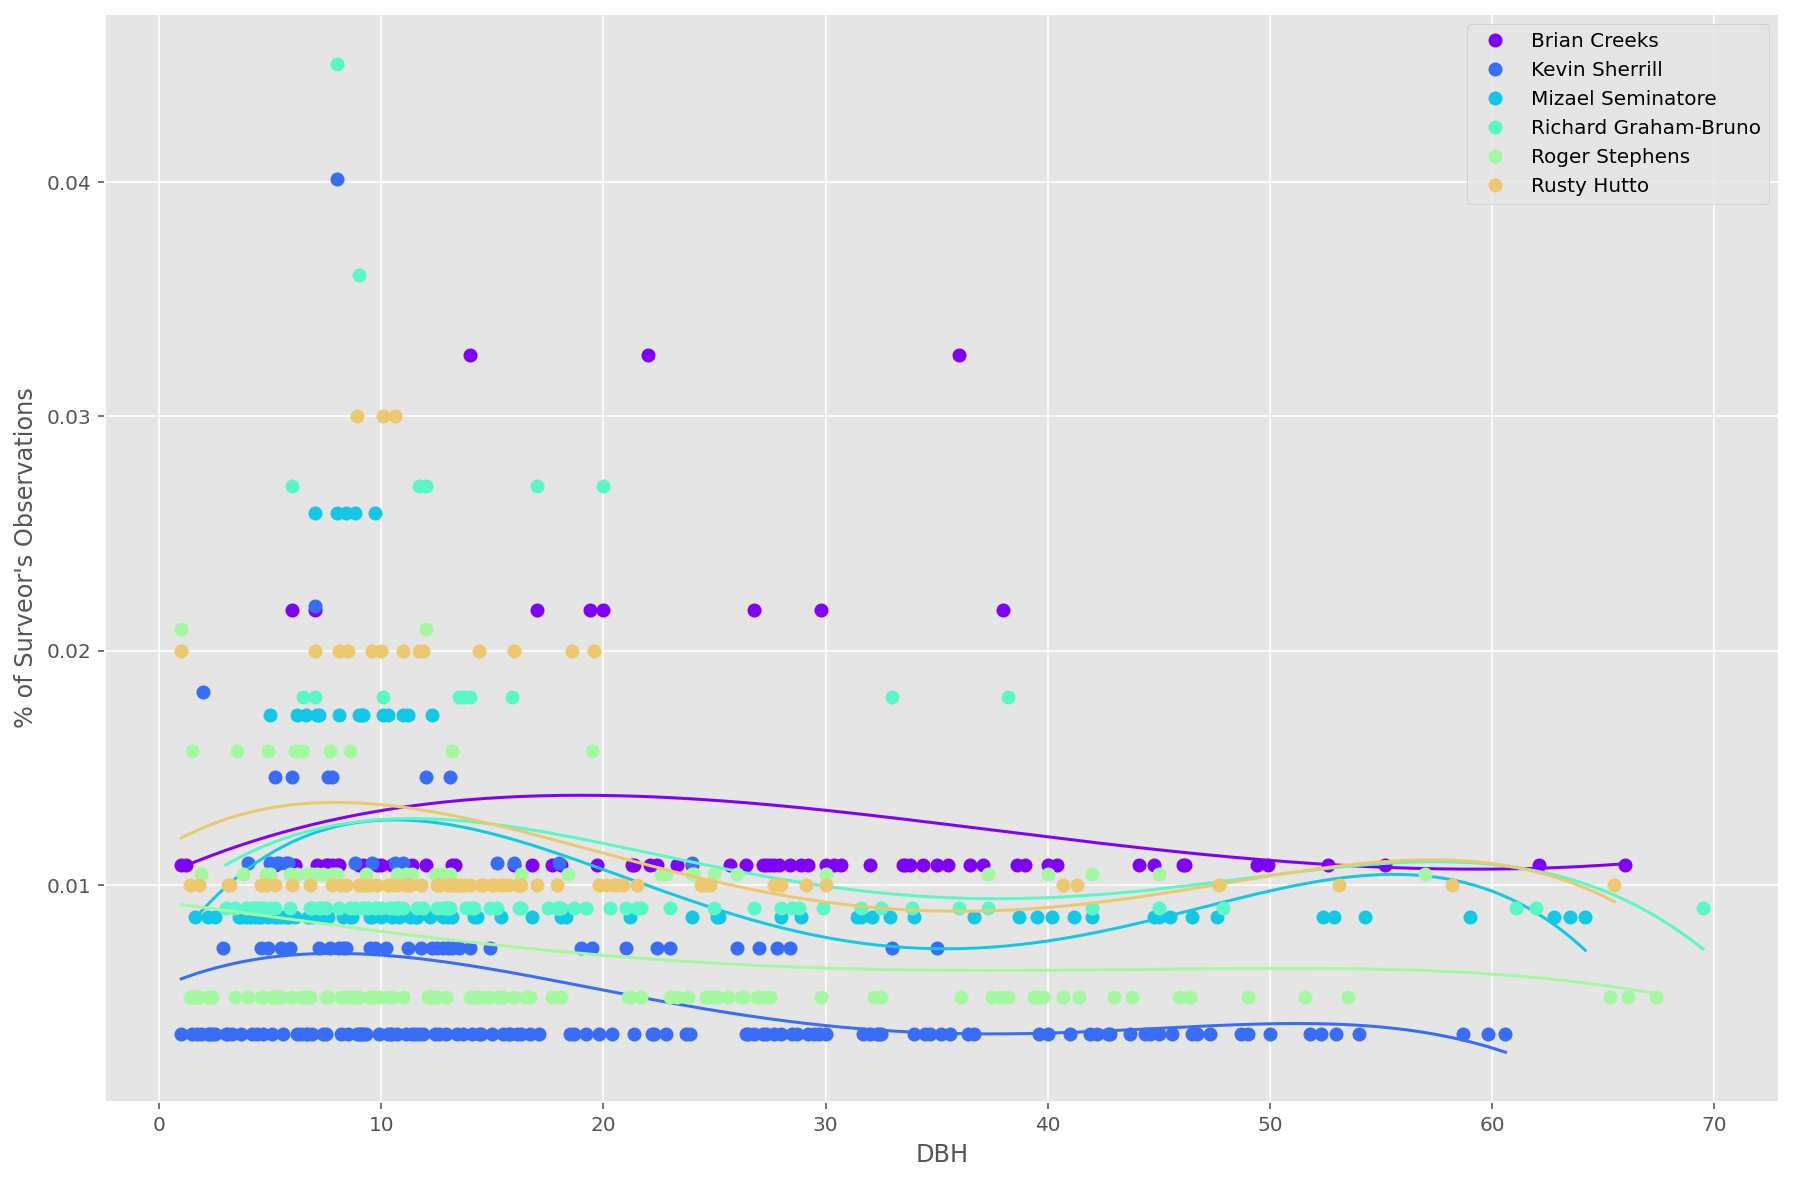

In [12]:
compare_surveyors(sub, 'DBH', obs_var='Surveyor_1', drop=5)

In [27]:
QAQC_gps(sub,4)

GPS spatial error is above threshold in records below:


,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
3,2020-02-04 21:16:04,Kevin Sherrill,Ryan Anderson,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84087,4.479174,"{'x': 6188190.27299422, 'y': 2037097.4080774784, 'spatialReference...",15.0,36.7,a787c2f3-c70e-4bae-8455-f1a7f5676a1c
6,2020-02-04 21:20:39,Kevin Sherrill,Ryan Anderson,Sambucus nigra,Alive,Shrub,0,None,NaN,GNSS:84087,4.304446,"{'x': 6188158.0670218915, 'y': 2037113.6587011367, 'spatialReferen...",NaN,NaN,NaN
583,2020-03-05 19:57:49,Roger Stephens,Kevin Sherrill,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84558,4.721458,"{'x': 6186331.477171138, 'y': 2035343.7314667255, 'spatialReferenc...",541.0,23.0,c896aaa3-acb5-434e-8637-20df8181a5c0
585,2020-03-05 21:40:29,Kevin Sherrill,Roger Stephens,Quercus lobata,Alive,Recruit,1,None,NaN,GNSS:84558,4.022352,"{'x': 6186527.151648551, 'y': 2035232.7667936385, 'spatialReferenc...",NaN,NaN,NaN
604,2020-03-05 22:02:12,Roger Stephens,Kevin Sherrill,Quercus lobata,Alive,Mature,2-5,None,NaN,GNSS:84558,4.930899,"{'x': 6186344.394796222, 'y': 2035414.51774247, 'spatialReference'...",561.0,49.0,4256ec8d-4450-4bc7-8df9-83e1c790d187
608,2020-03-05 22:13:22,Roger Stephens,Kevin Sherrill,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84558,4.498405,"{'x': 6186187.469585136, 'y': 2035561.4564249814, 'spatialReferenc...",565.0,6.1,9792bf09-3c5c-4273-8c5e-a328247d9b1e
609,2020-03-05 22:13:22,Roger Stephens,Kevin Sherrill,Quercus lobata,Alive,Mature,0,None,NaN,GNSS:84558,4.498405,"{'x': 6186187.469585136, 'y': 2035561.4564249814, 'spatialReferenc...",566.0,4.0,1f3de336-2c25-4273-9085-a68ca5c73044
660,2020-03-05 21:41:23,Mizael Seminatore,Richard Graham-Bruno,Aesculus californica,Alive,Mature,1,None,NaN,GNSS:84087,4.223372,"{'x': 6187793.651740223, 'y': 2035004.1724345535, 'spatialReferenc...",617.0,12.2,71d7d0f2-bcd0-47ff-967b-aa5a9e7639c1
712,2020-03-09 19:51:57,Richard Graham-Bruno,Brian Creeks,Aesculus californica,Alive,Mature,2-5,None,NaN,GNSS:84558,4.210512,"{'x': 6187195.564353719, 'y': 2035949.7686404735, 'spatialReferenc...",669.0,14.2,2315edb6-487c-4c76-af30-23c93a99083f
713,2020-03-09 19:51:57,Richard Graham-Bruno,Brian Creeks,Aesculus californica,Alive,Mature,2-5,None,NaN,GNSS:84558,4.210512,"{'x': 6187195.564353719, 'y': 2035949.7686404735, 'spatialReferenc...",670.0,17.9,8a28fcb1-cd5a-4ff7-8c15-1dacf706ad5f


In [30]:
#Check that recruit count doesn't equal 0 when Life Stage = Recruit
data.loc[(data.Life_Stage=='Recruit') & (data.Recruit_Count == '0'),:]

,Observation_Date,Surveyor_1,Surveyor_2,Species_Sci,DeadAlive,Life_Stage,Recruit_Count,Comments,ESRIGNSS_H_RMS,ESRIGNSS_RECEIVER,ESRIGNSS_AVG_H_RMS,SHAPE,OBJECTID,DBH,GlobalID
1306,2020-11-05 21:19:17,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,2.123055,"{'x': 6186948.584860802, 'y': 2036301.176730305, 'spatialReference...",NaN,NaN,NaN
1307,2020-11-05 21:19:53,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,1.616605,"{'x': 6186953.860440806, 'y': 2036280.1928483993, 'spatialReferenc...",NaN,NaN,NaN
1442,2020-11-06 17:42:32,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,4.615189,"{'x': 6187074.612823978, 'y': 2036432.705338642, 'spatialReference...",NaN,NaN,NaN
1445,2020-11-06 17:44:46,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,1.506699,"{'x': 6187148.727177054, 'y': 2036373.4183837324, 'spatialReferenc...",NaN,NaN,NaN
1452,2020-11-06 17:55:23,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,1.341808,"{'x': 6187218.223757222, 'y': 2036151.9919893146, 'spatialReferenc...",NaN,NaN,NaN
1464,2020-11-06 18:16:13,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,0.918189,"{'x': 6187199.7907232195, 'y': 2036024.2091083974, 'spatialReferen...",NaN,NaN,NaN
1484,2020-11-06 18:54:46,Kurt Lutz,None,Quercus lobata,Alive,Recruit,0,None,NaN,GNSS:84558,1.884807,"{'x': 6187343.099819809, 'y': 2036202.5617700666, 'spatialReferenc...",NaN,NaN,NaN
1680,2020-11-10 18:12:56,Brian Creeks,None,Quercus lobata,Alive,Recruit,0,Above 4.5 feet tall but DBH too low for mature tree category. On N...,NaN,iPhone XR,5.087576,"{'x': 6190120.64643006, 'y': 2035644.9375572205, 'spatialReference...",NaN,NaN,NaN
1681,2020-11-10 18:12:56,Brian Creeks,None,Quercus lobata,Alive,Recruit,0,"Stunted, stems mostly dead. Appears in poor health. On NW facing s...",NaN,iPhone XR,4.730330,"{'x': 6190156.23822239, 'y': 2035707.438416481, 'spatialReference'...",NaN,NaN,NaN
1817,2020-11-13 20:55:06,Silas Ellison,None,Quercus agrifolia,Alive,Recruit,0,"Near planted area, but seems to be outside it (nearby planted tree...",NaN,iPhone 8,5.000000,"{'x': 6181877.56736099, 'y': 2036615.408523992, 'spatialReference'...",NaN,NaN,NaN
